使用设备: cuda


Epoch 1/20: 100%|██████████| 1272/1272 [01:03<00:00, 20.09it/s]

Epoch 1, 平均训练损失: nan


验证集平均损失: nan


Epoch 2/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.48it/s]

Epoch 2, 平均训练损失: nan


验证集平均损失: nan


Epoch 3/20: 100%|██████████| 1272/1272 [01:01<00:00, 20.58it/s]

Epoch 3, 平均训练损失: nan


验证集平均损失: nan


Epoch 4/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.36it/s]

Epoch 4, 平均训练损失: nan


验证集平均损失: nan


Epoch 5/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.28it/s]

Epoch 5, 平均训练损失: nan


验证集平均损失: nan


Epoch 6/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.42it/s]

Epoch 6, 平均训练损失: nan


验证集平均损失: nan


Epoch 7/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.46it/s]

Epoch 7, 平均训练损失: nan


验证集平均损失: nan


Epoch 8/20: 100%|██████████| 1272/1272 [01:01<00:00, 20.57it/s]

Epoch 8, 平均训练损失: nan


验证集平均损失: nan


Epoch 9/20: 100%|██████████| 1272/1272 [01:01<00:00, 20.75it/s]

Epoch 9, 平均训练损失: nan


验证集平均损失: nan


Epoch 10/20: 100%|██████████| 1272/1272 [01:01<00:00, 20.54it/s]

Epoch 10, 平均训练损失: nan


验证集平均损失: nan


Epoch 11/20: 100%|██████████| 1272/1272 [01:00<00:00, 20.91it/s]

Epoch 11, 平均训练损失: nan


验证集平均损失: nan


Epoch 12/20: 100%|██████████| 1272/1272 [01:00<00:00, 21.00it/s]

Epoch 12, 平均训练损失: nan


验证集平均损失: nan


Epoch 13/20: 100%|██████████| 1272/1272 [01:00<00:00, 20.90it/s]

Epoch 13, 平均训练损失: nan


验证集平均损失: nan


Epoch 14/20: 100%|██████████| 1272/1272 [01:00<00:00, 21.08it/s]

Epoch 14, 平均训练损失: nan


验证集平均损失: nan


Epoch 15/20: 100%|██████████| 1272/1272 [01:00<00:00, 21.08it/s]

Epoch 15, 平均训练损失: nan


验证集平均损失: nan


Epoch 16/20: 100%|██████████| 1272/1272 [01:00<00:00, 21.19it/s]

Epoch 16, 平均训练损失: nan


验证集平均损失: nan


Epoch 17/20: 100%|██████████| 1272/1272 [01:00<00:00, 20.87it/s]

Epoch 17, 平均训练损失: nan


验证集平均损失: nan


Epoch 18/20: 100%|██████████| 1272/1272 [01:00<00:00, 21.10it/s]

Epoch 18, 平均训练损失: nan


验证集平均损失: nan


Epoch 19/20: 100%|██████████| 1272/1272 [01:00<00:00, 20.88it/s]

Epoch 19, 平均训练损失: nan


验证集平均损失: nan


Epoch 20/20: 100%|██████████| 1272/1272 [01:01<00:00, 20.67it/s]

Epoch 20, 平均训练损失: nan


验证集平均损失: nan
模型已保存到 /path/to/your/new/directory/clip_cvae_celeba_renyi.pth


/root/miniconda3/envs/pytorc_test1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/pytorc_test1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/pytorc_test1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/pytorc_test1/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26465 (\N{CJK UNIFIED IDEOGRAPH-6761}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/pytorc_test1/lib/python3.12/site-packages/IPython/core/pyl

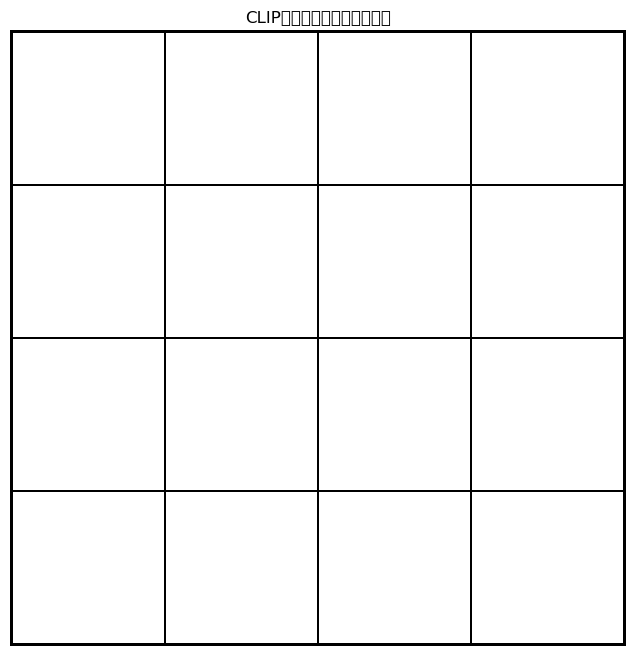

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import clip
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import random

# 设备选择
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 加载CLIP模型
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# 文本提示词
TEXT_PROMPTS = [
    "A portrait of a young woman",
    "A realistic face with a smile",
    "A person with distinct facial features"
]

# 生成CLIP文本嵌入（提前计算以避免重复计算）
def generate_text_embeddings(text_prompts):
    text_tokens = clip.tokenize(text_prompts).to(device)
    with torch.no_grad():
        text_embeddings = clip_model.encode_text(text_tokens)
    return text_embeddings.cpu()  # 移动到CPU

# 预先计算文本嵌入
CLIP_TEXT_EMBEDDINGS = generate_text_embeddings(TEXT_PROMPTS)

# CelebA数据集类
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_path, bbox_path, partition_path, 
                 transform=None, partition=0):
        """
        初始化数据集
        :param img_dir: 图像文件夹路径
        :param attr_path: 属性文件路径
        :param bbox_path: 边界框文件路径
        :param partition_path: 分区文件路径
        :param transform: 图像预处理
        :param partition: 使用的数据分区 (0: train, 1: val, 2: test)
        """
        self.img_dir = img_dir
        self.transform = transform

        # 读取属性文件
        attr_df = pd.read_csv(attr_path, sep=',', header=0)
        partition_df = pd.read_csv(partition_path, sep=',', header=0)
        
        # 合并属性文件和分区文件
        attr_df = attr_df.merge(partition_df, on='image_id')
        
        # 根据指定的分区进行筛选
        self.attr_df = attr_df[attr_df['partition'] == partition]
        
        # 读取边界框文件
        bbox_df = pd.read_csv(bbox_path, sep=',', header=0)
        
        # 合并边界框信息
        self.attr_df = self.attr_df.merge(bbox_df, on='image_id')

    def __len__(self):
        return len(self.attr_df)

    def __getitem__(self, idx):
        # 获取图像文件名
        img_name = self.attr_df.iloc[idx, 0]
        img_path = os.path.join(self.img_dir, img_name)
        
        # 打开图像并转换为RGB
        image = Image.open(img_path).convert('RGB')
        
        # 获取属性标签 
        attrs = self.attr_df.iloc[idx, 1:41].values
        attrs = (attrs + 1) // 2  # 将-1转为0，1保持1
        attrs = attrs.astype(np.float32)
        
        # 应用图像预处理
        if self.transform:
            image = self.transform(image)
        
        # 随机选择一个CLIP文本嵌入
        random_idx = random.randint(0, len(CLIP_TEXT_EMBEDDINGS) - 1)
        clip_embedding = CLIP_TEXT_EMBEDDINGS[random_idx]
        
        return image, attrs, clip_embedding

class ClipCVAE(nn.Module):
    def __init__(self, img_channels=3, img_size=64, latent_dim=128, 
                 cond_dim=40, clip_dim=512):
        super(ClipCVAE, self).__init__()
        self.img_size = img_size
        self.latent_dim = latent_dim
        self.cond_dim = cond_dim
        self.clip_dim = clip_dim

        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels + cond_dim + clip_dim, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(512*4*4, latent_dim)
        self.fc_logvar = nn.Linear(512*4*4, latent_dim)

        # 解码器部分
        self.decoder_input = nn.Linear(latent_dim + cond_dim + clip_dim, 512*4*4)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, img_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def encode(self, x, c, clip_embedding):
        # 将条件标签、图像和CLIP嵌入拼接
        c = c.view(c.size(0), self.cond_dim, 1, 1).repeat(1, 1, self.img_size, self.img_size)
        clip_embedding = clip_embedding.view(clip_embedding.size(0), self.clip_dim, 1, 1).repeat(1, 1, self.img_size, self.img_size)
        x = torch.cat([x, c, clip_embedding], dim=1)
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, c, clip_embedding):
        # 将潜在变量、条件标签和CLIP嵌入拼接
        z = torch.cat([z, c, clip_embedding], dim=1)
        x = self.decoder_input(z)
        x = x.view(-1, 512, 4, 4)
        x = self.decoder(x)
        return x

    def forward(self, x, c, clip_embedding):
        mu, logvar = self.encode(x, c, clip_embedding)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z, c, clip_embedding)
        return recon_x, mu, logvar

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # 修正归一化
])

# 数据集路径设置（请根据实际路径修改）
img_dir = '/root/autodl-tmp/celeba_datasets/img_align_celeba/img_align_celeba'
attr_path = '/root/autodl-tmp/celeba_datasets/list_attr_celeba.txt'
bbox_path = '/root/autodl-tmp/celeba_datasets/list_bbox_celeba.txt'
partition_path = '/root/autodl-tmp/celeba_datasets/list_eval_partition.txt'

# 创建训练集和验证集
train_dataset = CelebADataset(img_dir, attr_path, bbox_path, partition_path, 
                              transform=transform, partition=0)
val_dataset = CelebADataset(img_dir, attr_path, bbox_path, partition_path, 
                            transform=transform, partition=1)

# 数据加载器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 初始化模型、损失函数和优化器
latent_dim = 128
cond_dim = 40
clip_dim = 512
model = ClipCVAE(img_channels=3, img_size=64, latent_dim=latent_dim, 
                cond_dim=cond_dim, clip_dim=clip_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss(reduction='sum')

# 定义Rényi散度参数
alpha = 2  # 您可以根据需要调整α值
# alpha > 1 的值 0.5 2 5

# 定义损失函数
def loss_function_renyi(recon_x, x, mu, logvar, alpha=alpha):
    recon_loss = criterion(recon_x, x)
    
    # 计算Rényi散度
    # Rényi散度的公式对于高斯分布 q(z|x)=N(mu, sigma^2) 和 p(z)=N(0,1) 为：
    # D_alpha(q||p) = 1/(alpha -1) * log( (sigma_p / sigma_q)^alpha * exp(alpha/(2)*(mu^2 + sigma_q^2 -1)) )
    # 其中 sigma_p = 1， sigma_q = exp(0.5 * logvar)
    
    sigma_q = torch.exp(0.5 * logvar)
    sigma_p = torch.ones_like(sigma_q)  # p(z) = N(0, I)
    
    term1 = (sigma_p / sigma_q).pow(alpha)
    term2 = torch.exp(alpha / 2 * (mu.pow(2) + sigma_q.pow(2) - 1))
    renyi_div = (term1 * term2).log().sum()
    renyi_div = renyi_div / (alpha - 1)
    
    return recon_loss + renyi_div

# 训练模型
def train_model(model, train_loader, val_loader, optimizer, num_epochs=50):
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_loss = 0
        for batch_idx, (data, attrs, clip_emb) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}")):
            data = data.to(device, non_blocking=True)
            attrs = attrs.to(device, non_blocking=True)
            clip_emb = clip_emb.to(device, non_blocking=True)
            
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data, attrs, clip_emb)
            loss = loss_function_renyi(recon_batch, data, mu, logvar, alpha=alpha)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        
        avg_loss = train_loss / len(train_loader.dataset)
        print(f"Epoch {epoch}, 平均训练损失: {avg_loss:.4f}")
        
        # 验证集评估
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, attrs, clip_emb in val_loader:
                data = data.to(device, non_blocking=True)
                attrs = attrs.to(device, non_blocking=True)
                clip_emb = clip_emb.to(device, non_blocking=True)
                recon_batch, mu, logvar = model(data, attrs, clip_emb)
                loss = loss_function_renyi(recon_batch, data, mu, logvar, alpha=alpha)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader.dataset)
        print(f"验证集平均损失: {avg_val_loss:.4f}")
    
    return model

# 图像生成函数
def generate_images(model, attrs, text_prompts, device, num_images=16):
    """
    根据条件标签和文本提示生成图像
    """
    model.eval()
    
    with torch.no_grad():
        z = torch.randn(num_images, model.latent_dim).to(device)
        attrs = attrs[:num_images].to(device)
        
        # 对于每个图像随机选择一个文本嵌入
        text_embeddings = torch.stack([
            CLIP_TEXT_EMBEDDINGS[random.randint(0, len(CLIP_TEXT_EMBEDDINGS) - 1)] 
            for _ in range(num_images)
        ]).to(device)
        
        generated = model.decode(z, attrs, text_embeddings)
        generated = generated.cpu()
        return generated

# 训练模型（修改训练周期为20，根据需要调整）
trained_model = train_model(model, train_loader, val_loader, optimizer, num_epochs=20)

# 保存模型到新的路径（请根据需要修改路径）
new_model_save_path = '/path/to/your/new/directory/clip_cvae_celeba_renyi.pth'
os.makedirs(os.path.dirname(new_model_save_path), exist_ok=True)  # 确保目录存在
torch.save(trained_model.state_dict(), new_model_save_path)
print(f"模型已保存到 {new_model_save_path}")

# 生成图像示例
data_iter = iter(val_loader)
images, attrs, _ = next(data_iter)
sample_attrs = attrs[:16]

generated_images = generate_images(trained_model, sample_attrs, TEXT_PROMPTS, device, num_images=16)

# 可视化生成的图像
def show_images(images, title="Generated Images"):
    images = images * 0.5 + 0.5  # 反归一化
    grid = torchvision.utils.make_grid(images, nrow=4)
    np_grid = grid.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(np_grid, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_images(generated_images, title="CLIP引导的条件生成人脸图像")


In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import clip
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import random

# 设备选择
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 加载CLIP模型
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# 文本提示词
TEXT_PROMPTS = [
    "A portrait of a young woman",
    "A realistic face with a smile",
    "A person with distinct facial features"
]

# 生成CLIP文本嵌入（提前计算以避免重复计算）
def generate_text_embeddings(text_prompts):
    text_tokens = clip.tokenize(text_prompts).to(device)
    with torch.no_grad():
        text_embeddings = clip_model.encode_text(text_tokens)
    return text_embeddings.cpu()  # 移动到CPU

# 预先计算文本嵌入
CLIP_TEXT_EMBEDDINGS = generate_text_embeddings(TEXT_PROMPTS)

# CelebA数据集类
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_path, bbox_path, partition_path, 
                 transform=None, partition=0):
        """
        初始化数据集
        :param img_dir: 图像文件夹路径
        :param attr_path: 属性文件路径
        :param bbox_path: 边界框文件路径
        :param partition_path: 分区文件路径
        :param transform: 图像预处理
        :param partition: 使用的数据分区 (0: train, 1: val, 2: test)
        """
        self.img_dir = img_dir
        self.transform = transform

        # 读取属性文件
        attr_df = pd.read_csv(attr_path, sep=',', header=0)
        partition_df = pd.read_csv(partition_path, sep=',', header=0)
        
        # 合并属性文件和分区文件
        attr_df = attr_df.merge(partition_df, on='image_id')
        
        # 根据指定的分区进行筛选
        self.attr_df = attr_df[attr_df['partition'] == partition]
        
        # 读取边界框文件
        bbox_df = pd.read_csv(bbox_path, sep=',', header=0)
        
        # 合并边界框信息
        self.attr_df = self.attr_df.merge(bbox_df, on='image_id')

    def __len__(self):
        return len(self.attr_df)

    def __getitem__(self, idx):
        # 获取图像文件名
        img_name = self.attr_df.iloc[idx, 0]
        img_path = os.path.join(self.img_dir, img_name)
        
        # 打开图像并转换为RGB
        image = Image.open(img_path).convert('RGB')
        
        # 获取属性标签 
        attrs = self.attr_df.iloc[idx, 1:41].values
        attrs = (attrs + 1) // 2  # 将-1转为0，1保持1
        attrs = attrs.astype(np.float32)
        
        # 应用图像预处理
        if self.transform:
            image = self.transform(image)
        
        # 随机选择一个CLIP文本嵌入
        random_idx = random.randint(0, len(CLIP_TEXT_EMBEDDINGS) - 1)
        clip_embedding = CLIP_TEXT_EMBEDDINGS[random_idx]
        
        return image, attrs, clip_embedding

class ClipCVAE(nn.Module):
    def __init__(self, img_channels=3, img_size=64, latent_dim=128, 
                 cond_dim=40, clip_dim=512):
        super(ClipCVAE, self).__init__()
        self.img_size = img_size
        self.latent_dim = latent_dim
        self.cond_dim = cond_dim
        self.clip_dim = clip_dim

        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels + cond_dim + clip_dim, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Flatten()
        )
        self.fc_mu = nn.Linear(512*4*4, latent_dim)
        self.fc_logvar = nn.Linear(512*4*4, latent_dim)

        # 解码器部分
        self.decoder_input = nn.Linear(latent_dim + cond_dim + clip_dim, 512*4*4)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, img_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def encode(self, x, c, clip_embedding):
        # 将条件标签、图像和CLIP嵌入拼接
        c = c.view(c.size(0), self.cond_dim, 1, 1).repeat(1, 1, self.img_size, self.img_size)
        clip_embedding = clip_embedding.view(clip_embedding.size(0), self.clip_dim, 1, 1).repeat(1, 1, self.img_size, self.img_size)
        x = torch.cat([x, c, clip_embedding], dim=1)
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, c, clip_embedding):
        # 将潜在变量、条件标签和CLIP嵌入拼接
        z = torch.cat([z, c, clip_embedding], dim=1)
        x = self.decoder_input(z)
        x = x.view(-1, 512, 4, 4)
        x = self.decoder(x)
        return x

    def forward(self, x, c, clip_embedding):
        mu, logvar = self.encode(x, c, clip_embedding)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z, c, clip_embedding)
        return recon_x, mu, logvar

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # 修正归一化
])

# 数据集路径设置（请根据实际路径修改）
img_dir = '/root/autodl-tmp/celeba_datasets/img_align_celeba/img_align_celeba'
attr_path = '/root/autodl-tmp/celeba_datasets/list_attr_celeba.txt'
bbox_path = '/root/autodl-tmp/celeba_datasets/list_bbox_celeba.txt'
partition_path = '/root/autodl-tmp/celeba_datasets/list_eval_partition.txt'

# 创建训练集和验证集
train_dataset = CelebADataset(img_dir, attr_path, bbox_path, partition_path, 
                              transform=transform, partition=0)
val_dataset = CelebADataset(img_dir, attr_path, bbox_path, partition_path, 
                            transform=transform, partition=1)

# 数据加载器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 初始化模型、损失函数和优化器
latent_dim = 128
cond_dim = 40
clip_dim = 512
model = ClipCVAE(img_channels=3, img_size=64, latent_dim=latent_dim, 
                cond_dim=cond_dim, clip_dim=clip_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss(reduction='sum')

# 定义Rényi散度参数
alpha = 0.5  # 选择一个合适的α值，例如0.7

# 定义损失函数
def loss_function_renyi(recon_x, x, mu, logvar, alpha=alpha):
    recon_loss = criterion(recon_x, x)
    
    # 计算σ_q^2
    sigma_q_sq = torch.exp(logvar)
    
    # 计算 Rényi 散度
    renyi_div = (-torch.sum(torch.log(sigma_q_sq)) + alpha * torch.sum(mu ** 2) + torch.sum(sigma_q_sq) - mu.size(1)) / (2 * (alpha - 1))
    
    return recon_loss + renyi_div

# 训练模型
def train_model(model, train_loader, val_loader, optimizer, num_epochs=50, alpha=0.7):
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_loss = 0
        for batch_idx, (data, attrs, clip_emb) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}")):
            data = data.to(device, non_blocking=True)
            attrs = attrs.to(device, non_blocking=True)
            clip_emb = clip_emb.to(device, non_blocking=True)
            
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data, attrs, clip_emb)
            loss = loss_function_renyi(recon_batch, data, mu, logvar, alpha=alpha)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        
        avg_loss = train_loss / len(train_loader.dataset)
        print(f"Epoch {epoch}, 平均训练损失: {avg_loss:.4f}")
        
        # 验证集评估
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, attrs, clip_emb in val_loader:
                data = data.to(device, non_blocking=True)
                attrs = attrs.to(device, non_blocking=True)
                clip_emb = clip_emb.to(device, non_blocking=True)
                recon_batch, mu, logvar = model(data, attrs, clip_emb)
                loss = loss_function_renyi(recon_batch, data, mu, logvar, alpha=alpha)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader.dataset)
        print(f"验证集平均损失: {avg_val_loss:.4f}")
    
    return model

# 图像生成函数
def generate_images(model, attrs, text_prompts, device, num_images=16):
    """
    根据条件标签和文本提示生成图像
    """
    model.eval()
    
    with torch.no_grad():
        z = torch.randn(num_images, model.latent_dim).to(device)
        attrs = attrs[:num_images].to(device)
        
        # 对于每个图像随机选择一个文本嵌入
        text_embeddings = torch.stack([
            CLIP_TEXT_EMBEDDINGS[random.randint(0, len(CLIP_TEXT_EMBEDDINGS) - 1)] 
            for _ in range(num_images)
        ]).to(device)
        
        generated = model.decode(z, attrs, text_embeddings)
        generated = generated.cpu()
        return generated

# 训练模型（修改训练周期为20，根据需要调整）
trained_model = train_model(model, train_loader, val_loader, optimizer, num_epochs=20, alpha=0.7)

# 保存模型到新的路径（请根据需要修改路径）
new_model_save_path = '/path/to/your/new/directory/clip_cvae_celeba_renyi.pth'
os.makedirs(os.path.dirname(new_model_save_path), exist_ok=True)  # 确保目录存在
torch.save(trained_model.state_dict(), new_model_save_path)
print(f"模型已保存到 {new_model_save_path}")

# 生成图像示例
data_iter = iter(val_loader)
images, attrs, _ = next(data_iter)
sample_attrs = attrs[:16]

generated_images = generate_images(trained_model, sample_attrs, TEXT_PROMPTS, device, num_images=16)

# 可视化生成的图像
def show_images(images, title="Generated Images"):
    images = images * 0.5 + 0.5  # 反归一化
    grid = torchvision.utils.make_grid(images, nrow=4)
    np_grid = grid.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(np_grid, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_images(generated_images, title="CLIP引导的条件生成人脸图像")


使用设备: cuda


Epoch 1/20: 100%|██████████| 1272/1272 [01:03<00:00, 20.16it/s]

Epoch 1, 平均训练损失: nan


验证集平均损失: nan


Epoch 2/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.67it/s]

Epoch 2, 平均训练损失: nan


验证集平均损失: nan


Epoch 3/20: 100%|██████████| 1272/1272 [01:03<00:00, 19.99it/s]

Epoch 3, 平均训练损失: nan


验证集平均损失: nan


Epoch 4/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.77it/s]

Epoch 4, 平均训练损失: nan


验证集平均损失: nan


Epoch 5/20: 100%|██████████| 1272/1272 [01:03<00:00, 19.96it/s]

Epoch 5, 平均训练损失: nan


验证集平均损失: nan


Epoch 6/20: 100%|██████████| 1272/1272 [01:03<00:00, 20.14it/s]

Epoch 6, 平均训练损失: nan


验证集平均损失: nan


Epoch 7/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.78it/s]

Epoch 7, 平均训练损失: nan


验证集平均损失: nan


Epoch 8/20: 100%|██████████| 1272/1272 [01:03<00:00, 19.88it/s]

Epoch 8, 平均训练损失: nan


验证集平均损失: nan


Epoch 9/20: 100%|██████████| 1272/1272 [01:03<00:00, 20.14it/s]

Epoch 9, 平均训练损失: nan


验证集平均损失: nan


Epoch 10/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.75it/s]

Epoch 10, 平均训练损失: nan


验证集平均损失: nan


Epoch 11/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.80it/s]

Epoch 11, 平均训练损失: nan


验证集平均损失: nan


Epoch 12/20: 100%|██████████| 1272/1272 [01:04<00:00, 19.80it/s]

Epoch 12, 平均训练损失: nan


验证集平均损失: nan


Epoch 13/20: 100%|██████████| 1272/1272 [01:03<00:00, 20.13it/s]

Epoch 13, 平均训练损失: nan


验证集平均损失: nan


Epoch 14/20: 100%|██████████| 1272/1272 [01:02<00:00, 20.24it/s]

Epoch 14, 平均训练损失: nan


验证集平均损失: nan


Epoch 15/20: 100%|██████████| 1272/1272 [01:31<00:00, 13.95it/s]

Epoch 15, 平均训练损失: nan


验证集平均损失: nan


Epoch 16/20: 100%|██████████| 1272/1272 [01:31<00:00, 13.89it/s]

Epoch 16, 平均训练损失: nan


验证集平均损失: nan


Epoch 17/20: 100%|██████████| 1272/1272 [01:31<00:00, 13.97it/s]

Epoch 17, 平均训练损失: nan


验证集平均损失: nan


Epoch 18/20:  96%|█████████▋| 1226/1272 [01:19<00:02, 15.51it/s]


KeyboardInterrupt: 